###REGRESION LOGISTICA

Es un tipo de analisis de regresion utilizado para predecir el resultado de una variable categorica (una variable que puede adoptar un numero limitado a categorias) en funcion de otras variables independientes.

Es util para modelar la probabilidad de que un evento puede ocurrir en función de otros factores.

Es un metodo de clasificación, por ejemplo, para clasificar los correos segun sean validos o no, para clasificar a las personas que solicitan un prestamo segun lo puedan pagar o no, o para clasificar a las personas segun tengan o no una enfermedad concreta. Estos son ejemplo de clasificaciones binarias en los que solo hay dos categorias.

La funcion de regresion logistica recoge cualquier valor (eje X) y devolverá siempre un valor entre 0 y 1 (eje Y). Si el resultado es >= a 0.5 la salida será 1, y si el resultado es < 0.5 la saluda será 0

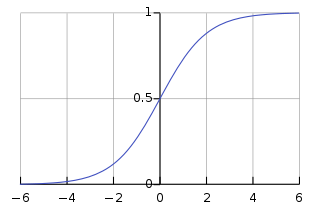

Una **matriz de confusión** sirve para evaluar nuestro modelo de regresión logistica. 

- PC (positivos correctos)
- NC (negativos correctos)
- FP (falsos positivos, error tipo 1)
- FN (falsos negativos, error tipo 2)

La **precision sirve** para saber la probabilildad de acierto en la prediccion. 

PRECISION = PC + NC / total de la muestra

La **tasa de error** sirve para saber la probabilidad de error en la prediccion.

TASA DE ERROR = FP + FN / total de la muestra



In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
from google.colab import drive

In [316]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Paso 1 OBTENCIÓN DE DATOS

In [317]:
path_train = "/content/drive/MyDrive/Colab Notebooks/Bimestre 3/titanic_train.csv"
path_test = "/content/drive/MyDrive/Colab Notebooks/Bimestre 3/titanic_test.csv"

In [318]:
entrenamiento = pd.read_csv(path_train)
entrenamiento

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [319]:
entrenamiento.isnull() #.sum() * 100 / len(entrenamiento)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


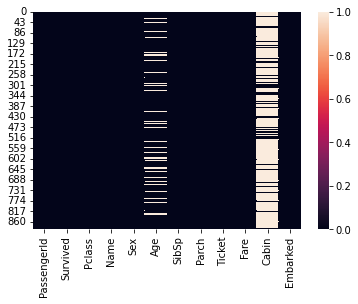

In [320]:
sns.heatmap(entrenamiento.isnull())
#miro las columnas que tienen nulos para despues no contemplar en el analisis por falta de datos

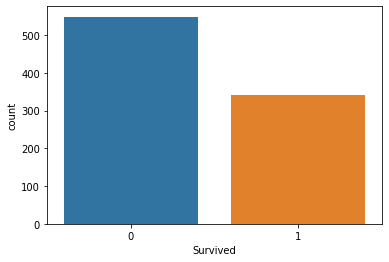

In [321]:
sns.countplot(x = 'Survived', data = entrenamiento)
#Vemos la cantidad de supervivientes

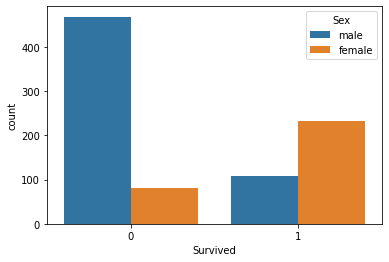

In [322]:
sns.countplot(x = 'Survived', data = entrenamiento, hue = 'Sex')
#Lo mismo, pero separado por sexo o la clase

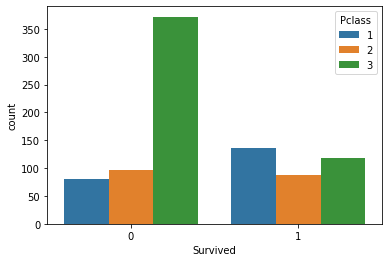

In [323]:
sns.countplot(x = 'Survived', data = entrenamiento, hue = 'Pclass')

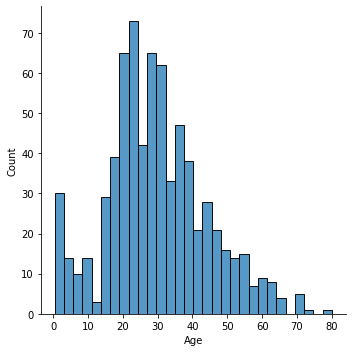

In [324]:
sns.displot(entrenamiento['Age'].dropna(), kde = False , bins = 30)
#distribucion de edades, quitando los null
#Con kde = False le digo que la parte curva no la grafique
#Con bins = 30 le digo la cantidad de barras a graficar

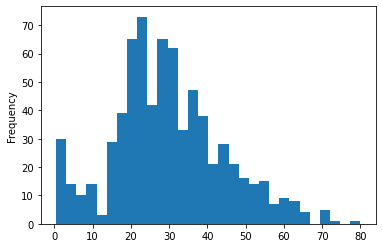

In [325]:
entrenamiento['Age'].plot.hist(bins = 30)
# mismo grafico de arriba pero usando pandas

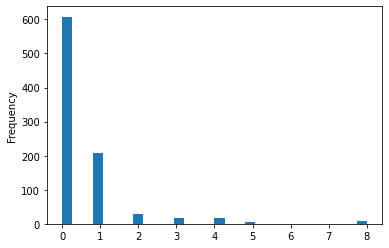

In [326]:
#numero de familiares por pasajero
entrenamiento['SibSp'].plot.hist(bins = 30)

Grafico interactivo con Cufflinks

In [327]:
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [328]:
import cufflinks as cf

In [329]:
cf.go_offline()

In [330]:
entrenamiento['Fare'].iplot() #(kind = 'hist', bins = 40)

Paso 2 LIMPIEZA DE DATOS

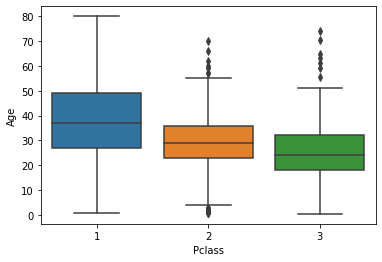

In [331]:
#En la edad cambiamos por la edad media de cada clase
sns.boxplot( x = 'Pclass', y = 'Age', data = entrenamiento) 

In [332]:
#funcion para rellenar los valores nulos con las medias calculadas
def edad_media(columnas):
  edad = columnas[0]
  clase = columnas[1]
  if pd.isnull(edad):
    if clase == 1:
      return 38
    elif clase == 2:
      return 30
    else:
      return 25
  else:
    return edad

In [333]:
entrenamiento['Age'] = entrenamiento[['Age', 'Pclass']].apply(edad_media, axis = 1)
#Le digo que sobre la columna edad aplique la funcion edad_media,
#y que tome el axis = 1 le decimos que la aplique sobre las columnas

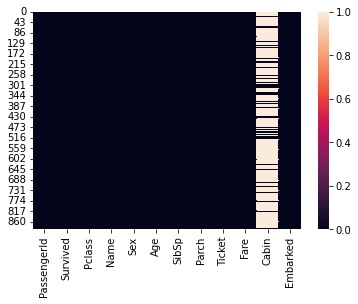

In [334]:
sns.heatmap(entrenamiento.isnull())
#la columna edad ahora tiene valores y no hay nulos

Para la columa de Cabin, hay demasiados nulos y vamos a borrarla directamente

In [335]:
entrenamiento.drop('Cabin', axis = 1, inplace = True)

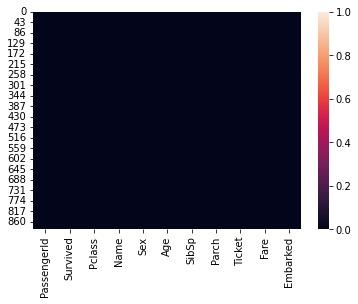

In [336]:
sns.heatmap(entrenamiento.isnull())

In [337]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Vamos a dejar solo las columnas numericas, quitando las columnas categoricas



In [338]:
entrenamiento.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [339]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Convertimos la columna sexo a numerico

In [340]:
sexo = pd.get_dummies(entrenamiento['Sex'], drop_first = True)
#con esto conseguimos un DF que crea dos columnas nuevas
#con el drop borro una de las columnas, me queda una sola y se la apendeamos al df original

In [341]:
sexo

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [342]:
entrenamiento = pd.concat([entrenamiento, sexo], axis = 1)

In [343]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


Elimino la columna original

In [344]:
entrenamiento.drop('Sex', axis = 1, inplace = True)

In [345]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


Con la columa de embarque hacemos lo mismo

In [346]:
entrenamient = pd.get_dummies(entrenamiento['Embarked'], drop_first = False)

In [347]:
puerto

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [348]:
entrenamiento = pd.concat([entrenamiento, puerto], axis = 1)

In [349]:
entrenamiento.drop('Embarked', axis = 1, inplace = True)

In [350]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


Paso 3 SEPARACIÓN DATOS DE ENTRENAMIENTO Y DE PRUEBA

In [351]:
y = entrenamiento['Survived'] #objetivo
x = entrenamiento.drop('Survived', axis = 1)

In [352]:
from sklearn.model_selection import train_test_split

In [353]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

Paso 4 ENTRENAMIENTO DEL MODELO

In [354]:
from sklearn.linear_model import LogisticRegression

In [355]:
modelo = LogisticRegression()
modelo.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Paso 5 EVALUACION DEL MODELO

In [356]:
predicciones = modelo.predict(x_test)

In [357]:
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

Vemos la presicion del modelo

In [358]:
from sklearn.metrics import classification_report

In [359]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.83      0.82      0.83       268



Para ver la matriz de confusion

In [360]:
from sklearn.metrics import (confusion_matrix)

In [361]:
confusion_matrix(y_test, predicciones)

array([[152,  26],
       [ 21,  69]])